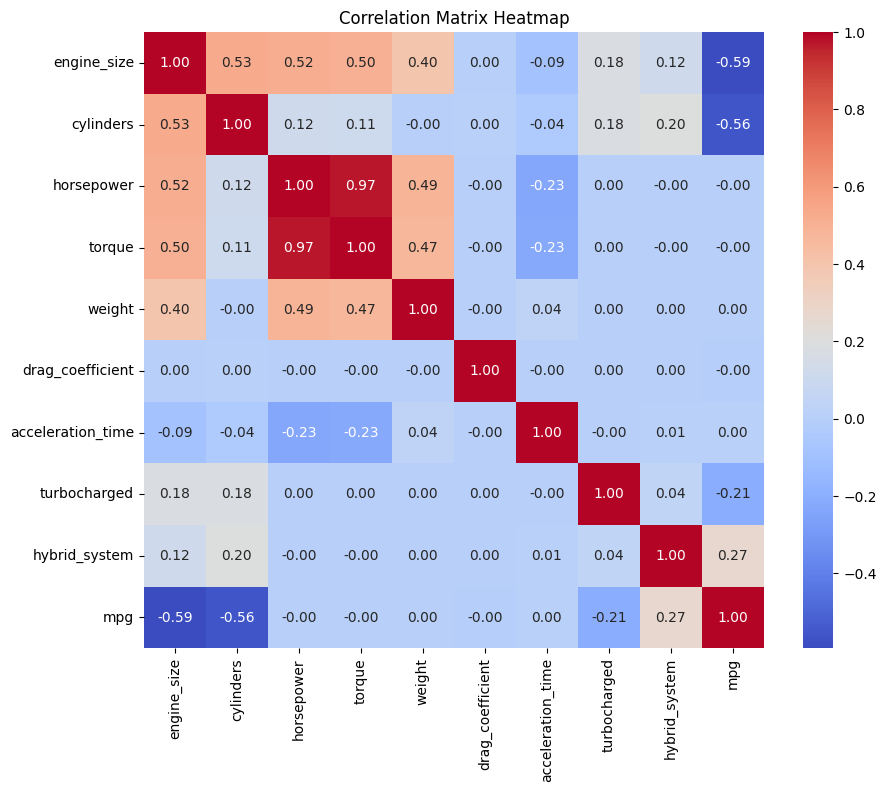

Missing values in X_train before cleaning:
engine_size          0
cylinders            0
horsepower           0
torque               0
weight               0
drag_coefficient     0
acceleration_time    0
power_to_weight      0
torque_to_weight     0
engine_efficiency    0
transmission         0
drivetrain           0
tire_type            0
fuel_type            0
fuel_injection       0
turbocharged         0
hybrid_system        0
dtype: int64
Missing values in X_train after cleaning:
engine_size          0
cylinders            0
horsepower           0
torque               0
weight               0
drag_coefficient     0
acceleration_time    0
power_to_weight      0
torque_to_weight     0
engine_efficiency    0
transmission         0
drivetrain           0
tire_type            0
fuel_type            0
fuel_injection       0
turbocharged         0
hybrid_system        0
dtype: int64


KeyboardInterrupt: 

In [ ]:
# train_model.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load and prepare the data
df = pd.read_csv('/content/improved_fuel_efficiency2.csv')

# ===============================
# Graph 1: Correlation Matrix & Heatmap for Numerical Features
# ===============================
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Feature Engineering
df['power_to_weight'] = df['horsepower'] / df['weight']   #Power per pound
df['torque_to_weight'] = df['torque'] / df['weight']      #Torque per pound
df['engine_efficiency'] = df['horsepower'] / df['engine_size'].replace(0, 0.1) #Power per litre

numeric_features = ['engine_size', 'cylinders', 'horsepower', 'torque', 'weight',
                    'drag_coefficient', 'acceleration_time', 'power_to_weight',
                    'torque_to_weight', 'engine_efficiency']
categorical_features = ['transmission', 'drivetrain', 'tire_type', 'fuel_type',
                        'fuel_injection', 'turbocharged', 'hybrid_system']
target = 'mpg'

# Data Preprocessing Pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data
X = df[numeric_features + categorical_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
print("Missing values in X_train before cleaning:")
print(X_train.isnull().sum())
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]  # Align y_train with cleaned X_train
print("Missing values in X_train after cleaning:")
print(X_train.isnull().sum())

# Create and train the XGBoost model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, objective='reg:squarederror'))
])

# Extended hyperparameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.3],
    'regressor__min_child_weight': [1, 3],
    'regressor__subsample': [0.8, 1.0],

}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Model Evaluation
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Accuracy (R² as percentage): {r2*100:.2f}%")


# Feature Importance Plot
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
importances = best_model.named_steps['regressor'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances')
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.show()


# Save the trained model
joblib.dump(best_model, 'xgboost_mpg_model.pkl')
print("Model saved as 'xgboost_mpg_model.pkl'")

In [ ]:
# Colab cell 1  ──────────────────────────────────
!pip install -q streamlit pyngrok xgboost scikit-learn seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [ ]:
# Colab cell 2 (optional drive) ────────────────
from google.colab import drive
drive.mount('/content/drive')

DATA_PATH = '/content/improved_fuel_efficiency2.csv'       # local
MODEL_PATH = '/content/xgboost_mpg_model.pkl'              # local
# Or on Drive:
# DATA_PATH  = '/content/drive/MyDrive/your_folder/improved_fuel_efficiency2.csv'
# MODEL_PATH = '/content/drive/MyDrive/your_folder/xgboost_mpg_model.pkl'


In [ ]:
# Colab cell 3 (Ngrok token) ───────────────────
from pyngrok import ngrok
ngrok.set_auth_token("PASTE_YOUR_NGROK_AUTH_TOKEN_HERE")
